<a href="https://www.kaggle.com/code/maryamevari/dementia-diagnosis-prognosis?scriptVersionId=189178638" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
# import system libs
import os
import pandas as pd

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
path_train = r"/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train"
path_test = r"/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test"
batch_s = 32
img_size= (224,224)
mode = "rgb"

In [6]:
def df_constructor(path):
    file_paths = []
    labels = []

    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path,fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path,file)
            file_paths.append(file_path)
            labels.append(fold)


    file_series = pd.Series(file_paths,name="file_paths")
    label_series = pd.Series(labels,name="labels")

    df = pd.concat([file_series,label_series],axis=1)
    return df

In [7]:
train = df_constructor(path_train)
test = df_constructor(path_test)
all_data = pd.concat([train,test])

In [8]:
train #5121 rows × 2 columns  --> file_paths	labels

,file_paths,labels
0,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
1,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
2,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
3,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
4,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
...,...,...
5116,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
5117,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
5118,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
5119,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented


In [9]:
test #1279 rows × 2 columns

,file_paths,labels
0,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
1,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
2,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
3,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
4,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
...,...,...
1274,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1275,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1276,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1277,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented


In [10]:
num_rows, num_cols = all_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 6400
Number of columns: 2


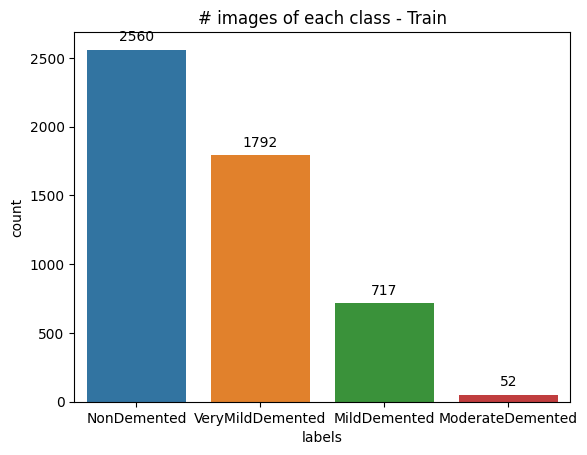

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

num_train = train.labels.value_counts().reset_index()
num_train.columns = ['labels', 'count']

ax = sns.barplot(data=num_train, x="labels", y="count")

# Add the exact number of labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title("# images of each class - Train")
plt.show()

In [12]:
print('num_train:\n',num_train)
test_count = test.labels.value_counts().reset_index()
print('num_test:\n',test_count)
all_count = all_data.labels.value_counts().reset_index()
print('num_all:\n',all_count)

num_train:
              labels  count
0       NonDemented   2560
1  VeryMildDemented   1792
2      MildDemented    717
3  ModerateDemented     52
num_test:
              labels  count
0       NonDemented    640
1  VeryMildDemented    448
2      MildDemented    179
3  ModerateDemented     12
num_all:
              labels  count
0       NonDemented   3200
1  VeryMildDemented   2240
2      MildDemented    896
3  ModerateDemented     64


In [13]:
#SMOTE, Synthetic Minority Over-sampling Technique, a method used to address class imbalance in datasets.
import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_dataframe(
    all_data,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    batch_size=batch_s,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 6400 validated image filenames belonging to 4 classes.


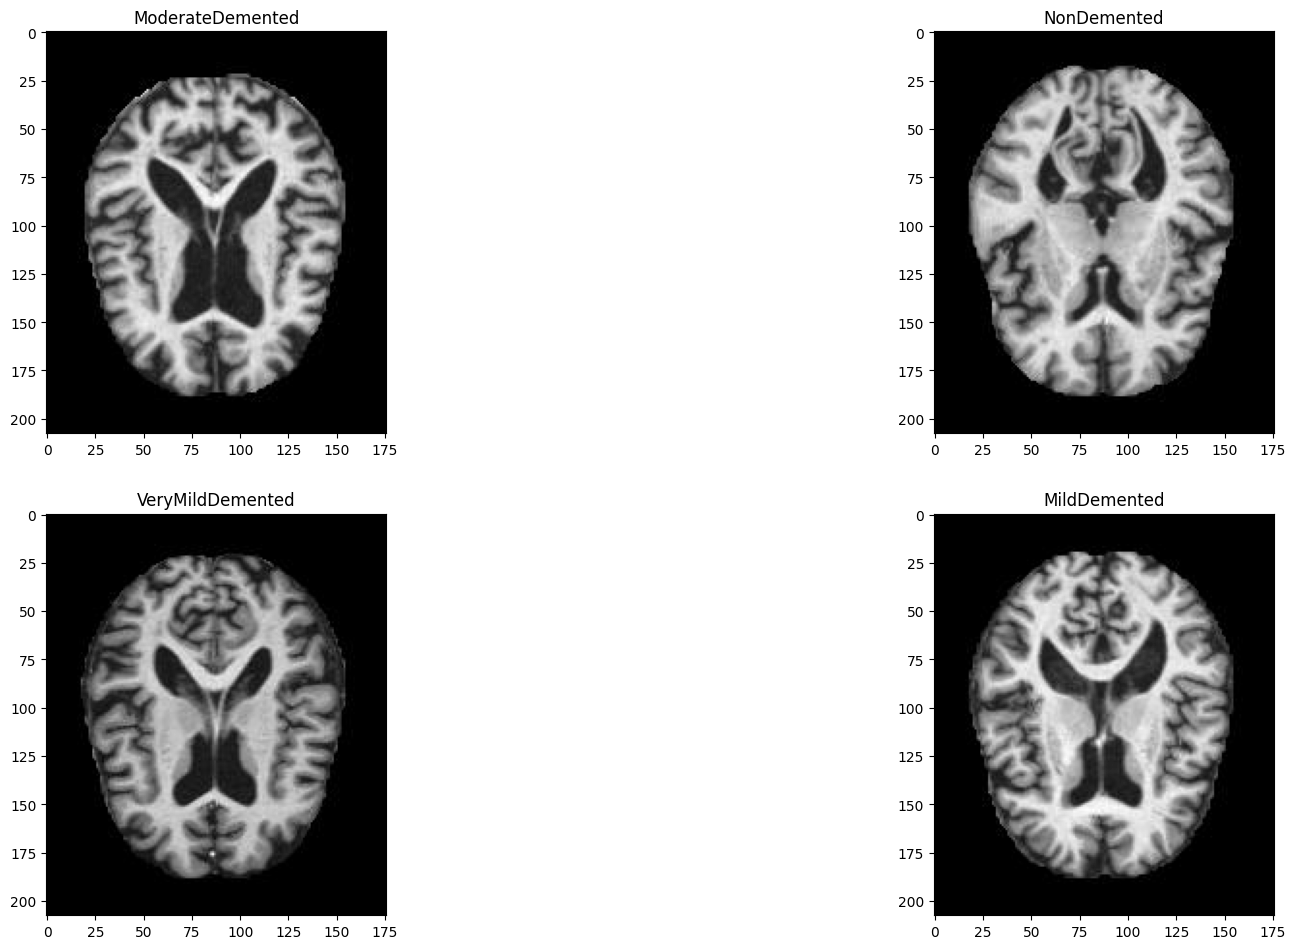

In [14]:
import numpy as np
g_dict = data_generator.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(data_generator)      # get a batch size samples from the generator

class_dirs = os.listdir(path_train)
plt.figure(figsize=(21, 24))
for i in range(len(class_dirs)):
    plt.subplot(4,2,i+1)
    img_path = f"{path_train}/{class_dirs[i]}/{os.listdir(f'{path_train}/{class_dirs[i]}')[0]}"
    img = plt.imread(img_path)/255
    plt.title(class_dirs[i])
    plt.imshow(img,cmap="gray")

In [15]:
#loading data from generator
data_imgs=np.concatenate([next(data_generator)[0] for i in range(data_generator.__len__())])
data_labels=np.concatenate([next(data_generator)[1] for i in range(data_generator.__len__())])

In [16]:
#Converting color images to a vector and applying SMOTE method
from imblearn.over_sampling import SMOTE
data_imgs = data_imgs.reshape(-1, 224*224* 3)
data_imgs,data_labels = SMOTE(random_state=7).fit_resample(data_imgs,data_labels)
data_imgs = data_imgs.reshape(-1,224,224,3)

In [17]:
data_generator.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [18]:
map  ={0:'MildDemented',
 1:'ModerateDemented',
 2:'NonDemented',
 3:'VeryMildDemented'}

In [19]:
labels=pd.Series([map[i] for i in np.argmax(data_labels,axis=1)],name="label")
labels_count = labels.value_counts().reset_index()
print(labels_count)

              label  count
0  ModerateDemented   3200
1       NonDemented   3200
2  VeryMildDemented   3200
3      MildDemented   3200


In [20]:
#Split data into train,validation, test
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels,test_labels = train_test_split(data_imgs,data_labels,  train_size= 0.75, shuffle= True, random_state= 7,stratify=data_labels)
test_imgs, val_imgs, test_labels,val_labels = train_test_split(test_imgs,test_labels,  train_size= 0.5, shuffle= True, random_state= 7,stratify= test_labels)

In [21]:
print(train_imgs.shape)
print(val_imgs.shape)
print(test_imgs.shape)

(9600, 224, 224, 3)
(1600, 224, 224, 3)
(1600, 224, 224, 3)


In [22]:
#model

from tensorflow.keras.applications import VGG16
base_model =tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3),pooling='max')


In [23]:
import requests

try:
    response = requests.get('https://www.google.com')
    print("Internet connection appears to be working: Status code", response.status_code)
except Exception as e:
    print("Failed to access the internet:", e)

Internet connection appears to be working: Status code 200


In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adamax

x = base_model.output
x = Dense(256,activation="relu")(x)
x = Dense(256,activation="relu")(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable= False


model.compile(loss="categorical_crossentropy", optimizer=Adamax(learning_rate=0.001), metrics=["accuracy","AUC"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping =EarlyStopping(patience=10, restore_best_weights=True,start_from_epoch=20)

# Train the model
history = model.fit(train_imgs, train_labels, epochs=25, batch_size=batch_s, validation_data=(val_imgs, val_labels))

Epoch 1/25


2024-07-21 13:14:31.827816: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-07-21 13:14:31.827871: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-07-21 13:14:31.827881: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-07-21 13:14:31.827889: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-07-21 13:14:31.827897: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.25159, expected 5.47629
2024-07-21 13:14:31.827904: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.43964, expected 4.66434
2024-07-21 13:14:31.827912: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.54333, expected 5.76803
2024-07-21 13:14:31.827920: E external/local_xla/xla/se

  2/300 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - AUC: 0.4895 - accuracy: 0.2734 - loss: 1.6896   

I0000 00:00:1721567688.203812     479 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


300/300 ━━━━━━━━━━━━━━━━━━━━ 47s 89ms/step - AUC: 0.7325 - accuracy: 0.4652 - loss: 1.1804 - val_AUC: 0.9015 - val_accuracy: 0.6425 - val_loss: 0.7325
Epoch 2/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - AUC: 0.9134 - accuracy: 0.6841 - loss: 0.6964 - val_AUC: 0.9397 - val_accuracy: 0.7406 - val_loss: 0.5932
Epoch 3/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - AUC: 0.9351 - accuracy: 0.7332 - loss: 0.5990 - val_AUC: 0.9337 - val_accuracy: 0.7175 - val_loss: 0.5932
Epoch 4/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - AUC: 0.9503 - accuracy: 0.7694 - loss: 0.5306 - val_AUC: 0.9559 - val_accuracy: 0.7800 - val_loss: 0.5019
Epoch 5/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - AUC: 0.9590 - accuracy: 0.7974 - loss: 0.4807 - val_AUC: 0.9625 - val_accuracy: 0.8112 - val_loss: 0.4622
Epoch 6/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - AUC: 0.9681 - accuracy: 0.8213 - loss: 0.4278 - val_AUC: 0.9680 - val_accuracy: 0.8206 - val_loss: 0.4238
Epoch 7/25
300/300 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model on the test set
results = model.evaluate(test_imgs, test_labels)

print("Test Loss, Test Accuracy, Test AUC:", results)

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(epochs,train_loss,'b',label="Train Loss")
plt.plot(epochs,val_loss,'g',label="Validation loss")
plt.title("Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,'b',label="Train Accuracy")
plt.plot(epochs,val_acc,'g',label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
predictions = model.predict(test_imgs) 
y_pred = np.argmax(predictions, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

In [ ]:
print(classification_report(y_true,y_pred))


In [ ]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("EfficientNetB0 confusion matrix")
plt.show()

In [ ]:
model.save("Alzheimer- VGG16.keras")